In [17]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import lightgbm as lgb
from lightgbm import plot_importance


In [2]:
train_df = pd.read_csv("./data/mushroom_train.csv", encoding="utf-8")
test_df = pd.read_csv("./data/mushroom_test.csv", encoding="utf-8")

df = pd.concat([train_df, test_df]).reset_index(drop=True)

In [3]:
df

,mushroom_id,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,1,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,2,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,3,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,4,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,NaN,k,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,b,c,l
8120,8120,NaN,x,s,n,f,n,a,c,b,...,s,o,o,p,n,o,p,b,v,l
8121,8121,NaN,f,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,b,c,l
8122,8122,NaN,k,y,n,f,y,f,c,n,...,k,w,w,p,w,o,e,w,v,l


In [4]:
# label encoder
# class : { 0 : e , 1 : p , 2 : nan}

label_encoder = LabelEncoder()

name_columns = ['class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

for name in name_columns:
    df[name] = label_encoder.fit_transform(df[name])

In [5]:
standard_scaler = StandardScaler()

name_columns_std_scaler = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']


df[name_columns_std_scaler] = standard_scaler.fit_transform(df[name_columns_std_scaler])

In [6]:
df

,mushroom_id,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,1,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1,0,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,2,0,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,3,1,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,4,0,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,2,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,8120,2,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,8121,2,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,8122,2,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [7]:
train_df = df[:6500]
test_df = df[6500:]

In [8]:
test_df = test_df.drop(["class"],axis=1)
test_df

,mushroom_id,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6500,6500,-0.840343,0.140128,-0.198250,-0.84323,-1.019565,0.162896,-0.438864,1.494683,-1.358896,...,0.586385,0.096577,0.107655,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,-0.877169
6501,6501,-0.216992,0.953270,-0.983899,-0.84323,1.357313,0.162896,-0.438864,1.494683,-1.358896,...,0.586385,0.096577,0.107655,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,-0.877169
6502,6502,-0.840343,0.953270,-0.983899,-0.84323,-1.019565,0.162896,-0.438864,1.494683,-1.358896,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,-0.877169
6503,6503,-0.840343,0.140128,-0.983899,-0.84323,-1.019565,0.162896,-0.438864,1.494683,-1.358896,...,-0.893053,0.622441,0.107655,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,-0.877169
6504,6504,-0.840343,0.953270,-0.983899,-0.84323,1.832689,0.162896,-0.438864,1.494683,-1.358896,...,0.586385,0.622441,0.107655,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,-0.877169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,-0.216992,0.140128,-0.198250,-0.84323,0.406562,-6.138869,-0.438864,-0.669038,1.748325,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,8120,1.029712,0.140128,-0.198250,-0.84323,0.406562,-6.138869,-0.438864,-0.669038,1.748325,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,8121,-0.840343,0.140128,-0.198250,-0.84323,0.406562,-6.138869,-0.438864,-0.669038,0.053477,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,8122,-0.216992,0.953270,-0.198250,-0.84323,1.832689,0.162896,-0.438864,1.494683,-1.358896,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [9]:
x_train = train_df.drop(['mushroom_id','class'],axis=1)
y_train = train_df['class']
x_test = test_df.drop(['mushroom_id'],axis=1)

In [10]:
model = lgb.LGBMClassifier()

stratified_kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1234)

param_grid = {
    'n_estimators' : np.arange(1,100,10),
    "max_depth":np.arange(1,10,1)
}

grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv = stratified_kf
)

In [11]:
result = grid_search.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430577 -> initscore=-0.279498
[LightGBM] [Info] Start training from score -0.279498
[LightGBM] [Info] Number of positive: 2239, number of negative: 2961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119
[LightGBM] [Info] Number of data points in the train set: 5200, number of used features: 19
[LightGBM] [Info] [binary:

In [12]:
result.best_params_

{'max_depth': 4, 'n_estimators': 51}

In [13]:
result.best_score_

1.0

In [14]:
model = lgb.LGBMClassifier(
    n_estimators=51,
    max_depth=4
)

In [15]:
model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 2799, number of negative: 3701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430615 -> initscore=-0.279341
[LightGBM] [Info] Start training from score -0.279341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(max_depth=4, n_estimators=51)

In [16]:
model.score(x_train,y_train)

1.0

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

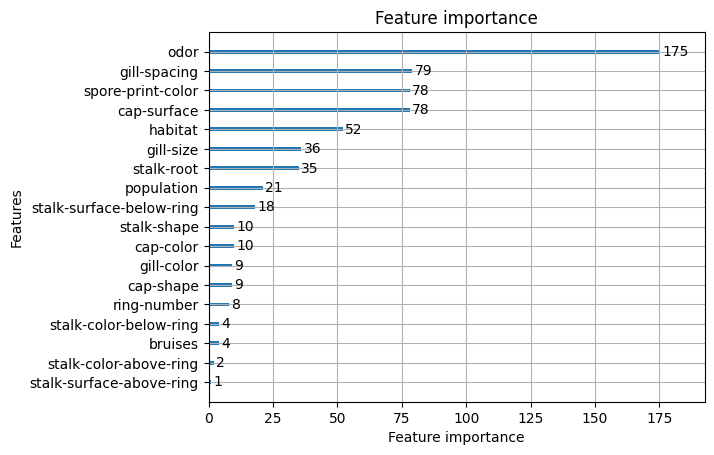

In [18]:
plot_importance(model)

In [19]:
df.info()  # cap-shape , gill-attachment , veil-color , ring-type , 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mushroom_id               8124 non-null   int64  
 1   class                     8124 non-null   int32  
 2   cap-shape                 8124 non-null   float64
 3   cap-surface               8124 non-null   float64
 4   cap-color                 8124 non-null   float64
 5   bruises                   8124 non-null   float64
 6   odor                      8124 non-null   float64
 7   gill-attachment           8124 non-null   float64
 8   gill-spacing              8124 non-null   float64
 9   gill-size                 8124 non-null   float64
 10  gill-color                8124 non-null   float64
 11  stalk-shape               8124 non-null   float64
 12  stalk-root                8124 non-null   float64
 13  stalk-surface-above-ring  8124 non-null   float64
 14  stalk-su

In [27]:
y_test_pred = model.predict(x_test)
test_df['class'] = y_test_pred
test_df["class"] = test_df["class"].replace([1,0],["p","e"])

In [28]:
test_df[['mushroom_id','class']].to_csv('./data/mushroom_submission_2.csv',index=False)